In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load MovieLens dataset
def load_movielens_data():
    url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.data"
    df = pd.read_csv(url, sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    return df

# Load movies data
def load_movies_data():
    url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.item"
    columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    movies_df = pd.read_csv(url, sep='|', header=None, names=columns, encoding="ISO-8859-1")
    return movies_df[['item_id', 'movie_title']]

In [3]:
# Split into control (A) and treatment (B) groups
def split_data(df):
    df['group'] = np.random.choice(['A', 'B'], size=len(df), p=[0.5, 0.5])
    return df


In [4]:
# Compute A/B test metrics
def ab_test_results(df):
    avg_rating_A = df[df['group'] == 'A']['rating'].mean()
    avg_rating_B = df[df['group'] == 'B']['rating'].mean()
    uplift = ((avg_rating_B - avg_rating_A) / avg_rating_A) * 100

    print(f"Average Rating in Control (A): {avg_rating_A:.2f}")
    print(f"Average Rating in Treatment (B): {avg_rating_B:.2f}")
    print(f"Percentage Uplift: {uplift:.2f}%")
    # Visualization: Histogram of ratings
    plt.figure(figsize=(10, 5))
    plt.hist(df[df['group'] == 'A']['rating'], bins=np.arange(1, 7)-0.5, alpha=0.6, label='Control (A)', color='blue')
    plt.hist(df[df['group'] == 'B']['rating'], bins=np.arange(1, 7)-0.5, alpha=0.6, label='Treatment (B)', color='orange')
    plt.xticks(range(1, 6))
    plt.xlabel("Ratings")
    plt.ylabel("Frequency")
    plt.title("Distribution of Ratings in A/B Test")
    plt.legend()
    plt.show()

In [5]:
# Multi-Armed Bandit (Epsilon-Greedy)
def multi_armed_bandit(df, movies_df, epsilon=0.1, iterations=1000):
    movie_rewards = {}
    movie_counts = {}

    for i in range(iterations):
        if np.random.rand() < epsilon:
            selected_movie = np.random.choice(df['item_id'].unique())  # Explore
        else:
            if movie_rewards:
                selected_movie = max(movie_rewards, key=lambda k: movie_rewards[k] / movie_counts[k])  # Exploit
            else:
                selected_movie = np.random.choice(df['item_id'].unique())

        reward = df[df['item_id'] == selected_movie]['rating'].mean()

        if selected_movie in movie_rewards:
            movie_rewards[selected_movie] += reward
            movie_counts[selected_movie] += 1
        else:
            movie_rewards[selected_movie] = reward
            movie_counts[selected_movie] = 1

    # Get the best movie's item_id
    best_movie_id = max(movie_rewards, key=lambda k: movie_rewards[k] / movie_counts[k])
    
    # Fetch the movie title from the movies_df
    best_movie_title = movies_df[movies_df['item_id'] == best_movie_id]['movie_title'].values[0]
    
    print(f"Best movie selected by Multi-Armed Bandit: {best_movie_title}")


Average Rating in Control (A): 3.53
Average Rating in Treatment (B): 3.53
Percentage Uplift: -0.15%


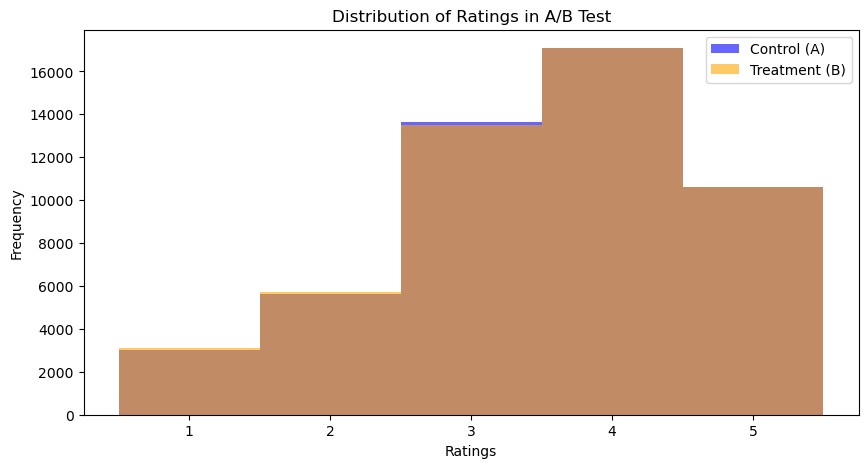

Best movie selected by Multi-Armed Bandit: Santa with Muscles (1996)


In [6]:
# Run the experiment
df = load_movielens_data()
movies_df = load_movies_data()  # Load movie titles
df = split_data(df)
ab_test_results(df)
multi_armed_bandit(df, movies_df)

Interpretation of Results:

The very small negative uplift of -0.15% suggests that the intervention applied in the treatment group didn’t result in a noticeable change in user ratings. This could mean that the changes made in the treatment group did not resonate with users or were not impactful enough to cause a meaningful difference in their ratings.

Movie Recommendation Systems: The Multi-Armed Bandit approach, however, shows that “Santa with Muscles (1996)” was the movie that yielded the best user ratings during the experiment, which might indicate that the algorithm found it to be particularly engaging for a portion of the user base. This could be useful in refining movie recommendations for users, suggesting movies that are more likely to generate positive ratings.

Next Steps: Given the lack of significant impact from the A/B test, it may be worth:
	•	Testing different interventions or exploring other aspects of the user experience.
	•	Refining the Multi-Armed Bandit algorithm to experiment with other types of feedback or rewards, such as viewing time, movie genre preference, or user engagement metrics beyond just ratings.